### Задание №1.
Проведите небольшое исследование алгоритма градиентного спуска. Оцените влияние значений скорости обучения (`alpha`) и количества итераций на ошибку алгоритма. Как связаны эти два гиперпараметра между собой? Подберите скорость обучения и количество итераций до совпадения ответов алгоритма с результатами МНК. Как можно ускорить процесс вычисления весов?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]).T
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [4]:
n = X.shape[0]
alpha_arr = np.array([3e-3, 5e-3, 1e-2, 2e-2, 4e-2])
iter_arr = np.arange(1201)
err_df = []

for alpha in alpha_arr:
    print(f'alpha = {alpha}')
    w = np.array([1, 0.5])
    err_arr = []
    for i in iter_arr:
        y_pred = np.dot(w, X.T)
        err = calc_mse(y, y_pred)
        err_arr.append(err)
        if i % 100 == 0:
            print(i, w, err) # МНК: array([47.23214286,  3.91071429]) 45.937499999999986
        w -= alpha * (1/n * 2 * np.dot(X.T, y_pred - y))
    err_df.append(err_arr)
    print(50*'*')

err_df = np.array(err_df)

alpha = 0.003
0 [1.  0.5] 3173.15
100 [14.96620143  9.86795836] 605.6406683102937
200 [23.62414363  8.27011187] 345.57199306044134
300 [29.9588074   7.10036781] 206.34543843413772
400 [34.59370979  6.24449763] 131.81114708875458
500 [37.9849427   5.61828053] 91.90955934014139
600 [40.46621624  5.16009439] 70.54842909899533
700 [42.28169707  4.82485197] 59.1128469348479
800 [43.61003537  4.57956414] 52.99086097452291
900 [44.58194463  4.40009366] 49.713484137870225
1000 [45.29306439  4.26877996] 47.958955623914356
1100 [45.81337151  4.17270127] 47.01967690812652
1200 [46.19406618  4.10240309] 46.516838396860045
**************************************************
alpha = 0.005
0 [1.  0.5] 3173.15
100 [21.04725202  8.74595374] 414.5541707681393
200 [31.68407604  6.78178376] 175.90244862743472
300 [38.00001029  5.61549819] 91.75986564758271
400 [41.75028632  4.92298103] 62.09331136079918
500 [43.97712557  4.51177813] 51.63363194423746
600 [45.29937839  4.26761403] 47.94581257567725
700 [46.

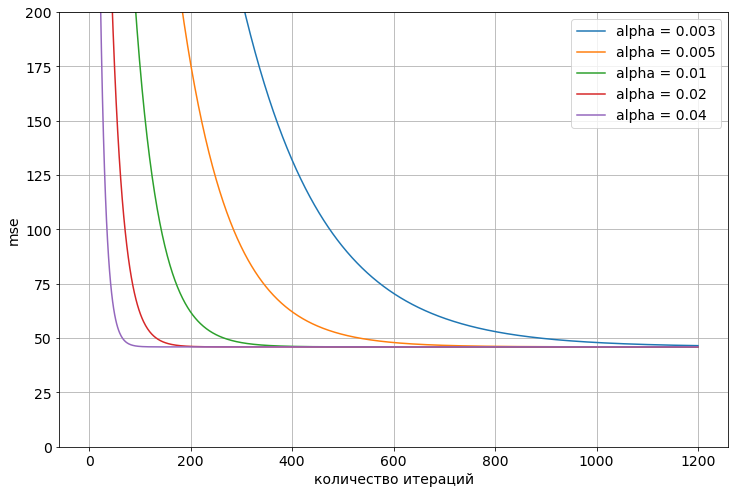

In [5]:
plt.figure(figsize=[12, 8])
plt.ylim(0, 200)

for i in range(5):
    plt.plot(iter_arr, err_df[i], label=f'alpha = {alpha_arr[i]}')

plt.xlabel('количество итераций')
plt.ylabel('mse')
plt.legend()
plt.grid()
plt.show()

При увеличении значения скорости обучения ($\alpha$) и при фиксировании количества итераций средняя квадратичная ошибка (mse) уменьшается. То есть алгоритм быстрее стремится к минимальной ошибке. Однако существует некоторое значение $\alpha$, при превышении которого mse начинает резко расти.   
В свою очередь увеличение количества итераций при фиксированной скорости обучения также ведёт к уменьшению ошибки (увеличению точности алгоритма). То есть алгоритм продолжает стремиться к минимальной ошибке.   
Если же рассматривать некоторое фиксированное значение ошибки, то увидим, что зависимость между скоростью обучения и количеством итераций обратнопропорциональная. Например, при увеличении скорости обучения в 2 раза для достижения той же ошибки потребуется в 2 раза меньшее количество итераций.

Для совпадения значений весов до 8го знака после запятой с результатами МНК необходимы скорость обучения 0.02 и количество итераций порядка 1200. Если же увеличим скорость обучения, допустим, до 0.04, в таком случае для достижения той же точности значения ошибки достаточно будет порядка 600 итераций.   
Собственно увеличением $\alpha$ мы и ускоряем процесс вычисления весов.
___

### Задание №2.
В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [6]:
w = np.array([1, 0.5])
alpha = 1e-2
for i in range(1001):
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    if i % 100 == 0:
        print(i, w, err)
    w -= (alpha * (1/n * 2 * np.sum(X.T * (y_pred - y)))) # ошибка!

0 [1.  0.5] 3173.15
100 [11.82211538 11.32211538] 737.091826923077
200 [11.82211538 11.32211538] 737.091826923077
300 [11.82211538 11.32211538] 737.091826923077
400 [11.82211538 11.32211538] 737.091826923077
500 [11.82211538 11.32211538] 737.091826923077
600 [11.82211538 11.32211538] 737.091826923077
700 [11.82211538 11.32211538] 737.091826923077
800 [11.82211538 11.32211538] 737.091826923077
900 [11.82211538 11.32211538] 737.091826923077
1000 [11.82211538 11.32211538] 737.091826923077


Исправить ошибку можем, вместо `np.sum(X.T * (y_pred - y))` прописав `np.dot(X.T, y_pred - y)`

In [7]:
w = np.array([1, 0.5])
alpha = 1e-2
for i in range(1001):
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    if i % 100 == 0:
        print(i, w, err)
    w -= alpha * (1/n * 2 * np.dot(X.T, y_pred - y))

0 [1.  0.5] 3173.15
100 [31.72648327  6.77395294] 175.19445858001848
200 [41.78014899  4.91746666] 61.9177717428135
300 [45.3151501   4.26470166] 47.913169919666764
400 [46.55810299  4.0351809 ] 46.18175564810758
500 [46.99514157  3.95447839] 45.96769776787538
600 [47.14881009  3.92610232] 45.941233404700036
700 [47.20284196  3.91612492] 45.93796156758049
800 [47.22184028  3.91261674] 45.937557064435396
900 [47.22852033  3.91138321] 45.937507054979434
1000 [47.23086913  3.91094949] 45.937500872219886


___

### Задание №3.
Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога. 

Сколько нужно сделать итераций, если установить допустимое отклонение mse в размере $\text{diff}=10^{-6}$, а значение $\alpha=10^{-2}$?

In [8]:
w = np.array([1, 0.5])
diff = 1e-6
alpha = 1e-2
i = 0
cur_diff = np.inf
prev_err = np.inf
while True:
    w -= alpha * (1/n * 2 * np.dot(X.T, y_pred - y))
    i += 1
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    cur_diff = prev_err - err
    prev_err = err
    if cur_diff < diff:
        break
print(i, w, err)

810 [47.22276526  3.91244593] 45.93754727777008


Для достижения значения изменения средней квадратичной ошибки за итерацию $diff=10^{-6}$ со скоростью обучения $\alpha = 10^{-2}$ необходимо выполнить __810__ итераций.